In [1]:
import pandas as pd
import os
import datetime
from datetime import time
import geopy.distance
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv('Dataset/Combined_Dataset.csv')

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,ride_duration,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_the_week
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,00:02:43,Start Station,-1,End Station,-1,41.80,-87.59,41.80,-87.60,member,6
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,00:06:17,Start Station,-1,End Station,-1,41.79,-87.59,41.80,-87.60,member,4
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,00:05:59,Start Station,-1,End Station,-1,41.80,-87.60,41.79,-87.59,member,4
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,00:25:50,Start Station,-1,End Station,-1,41.78,-87.58,41.80,-87.60,member,3
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,00:04:08,Start Station,-1,End Station,-1,41.80,-87.59,41.79,-87.59,member,4


In [105]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
ride_duration          object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
day_of_the_week        object
dtype: object

In [18]:
df['ride_duration'] = pd.to_datetime(df['ride_duration']).values.astype(np.int64)

In [19]:
df.head()

,ride_id,rideable_type,started_at,ended_at,ride_duration,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_the_week
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,1658361763000000000,Start Station,-1,End Station,-1,41.80,-87.59,41.80,-87.60,member,6
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,1658361977000000000,Start Station,-1,End Station,-1,41.79,-87.59,41.80,-87.60,member,4
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,1658361959000000000,Start Station,-1,End Station,-1,41.80,-87.60,41.79,-87.59,member,4
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,1658363150000000000,Start Station,-1,End Station,-1,41.78,-87.58,41.80,-87.60,member,3
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,1658361848000000000,Start Station,-1,End Station,-1,41.80,-87.59,41.79,-87.59,member,4


## Basic Visualization

### Plot Membership Type Distribution

In [115]:
df['member_casual'].value_counts()

member    3299953
casual    2555787
Name: member_casual, dtype: int64

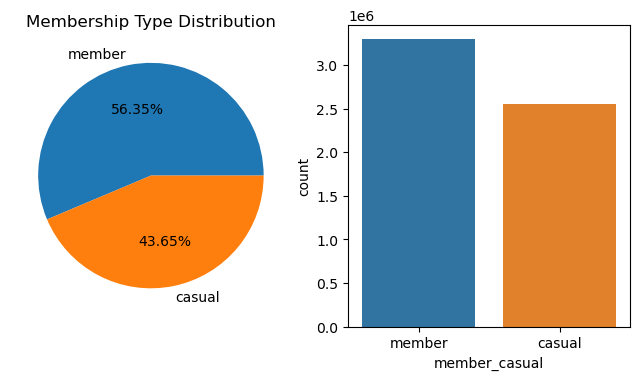

In [116]:
member_df = df['member_casual'].value_counts().rename_axis('membership_type').reset_index(name='counts')
labels = member_df.membership_type
values = member_df.counts

plt.figure(figsize=(8,4), dpi=100)
plt.subplot(1,2,1)
plt.pie(values, labels=labels, autopct='%1.2f%%')
plt.title('Membership Type Distribution')

plt.subplot(1,2,2)
sns.countplot(data=df, x='member_casual')
plt.show()

### Plot Rideable Type Distribution

In [117]:
df['rideable_type'].value_counts()

classic_bike     3213591
electric_bike    2368592
docked_bike       273557
Name: rideable_type, dtype: int64

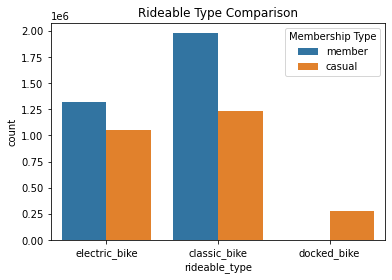

In [17]:
plt.figure(figsize=(6,4))
plt.title('Rideable Type Comparison')
sns.countplot(data=df, x='rideable_type', hue='member_casual')
plt.legend(title='Membership Type', loc='upper right', labels=['member', 'casual'])
plt.show()

### Plot Ride Day Counts

In [5]:
labels=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
df['day_of_the_week'] = df['day_of_the_week'].apply(lambda x:labels[x])

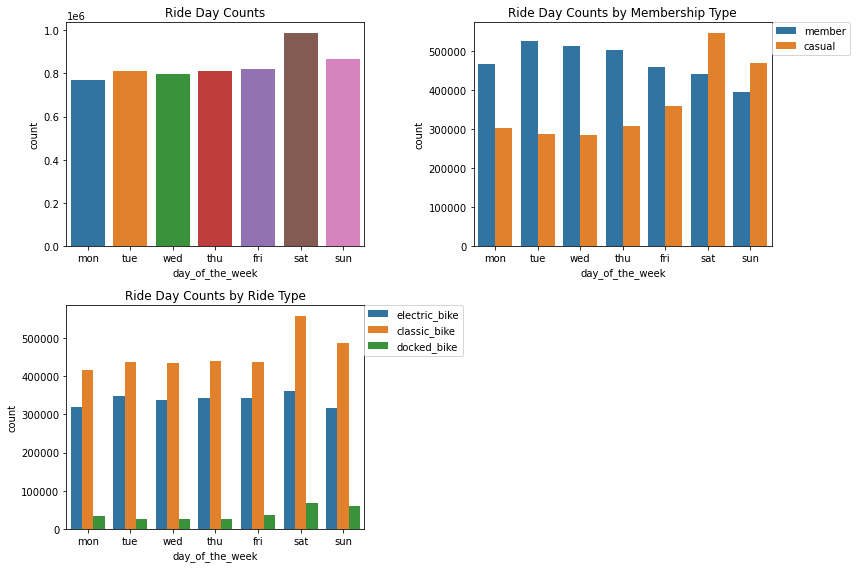

In [22]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.title('Ride Day Counts')
sns.countplot(data=df, x='day_of_the_week', order=['mon','tue','wed','thu','fri','sat','sun'])

plt.subplot(2,2,2)
plt.title('Ride Day Counts by Membership Type')
sns.countplot(data=df, x='day_of_the_week', order=['mon','tue','wed','thu','fri','sat','sun'], hue='member_casual')
plt.legend(title='Membership Type', loc='upper left', labels=['member', 'casual'])
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

plt.subplot(2,2,3)
plt.title('Ride Day Counts by Ride Type')
sns.countplot(data=df, x='day_of_the_week', order=['mon','tue','wed','thu','fri','sat','sun'], hue='rideable_type')
plt.legend(title='Ride_Type', loc='upper left')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

### Plot Station

In [37]:
df['start_station_name'].value_counts()

Start Station                           823167
Streeter Dr & Grand Ave                  84157
Wells St & Concord Ln                    44056
Michigan Ave & Oak St                    43972
Millennium Park                          41182
                                         ...  
Wentworth Ave & 79th St                      1
Austin Branch Chicago Public Library         1
Legler Regional Library                      1
Harding Ave & 47th St                        1
Springfield Ave & 63rd St                    1
Name: start_station_name, Length: 1106, dtype: int64

In [38]:
df['start_station_name'].nunique()

1106

In [96]:
import collections
stations = df['start_station_name'].to_list()
start_counter=collections.Counter(stations)
start_counter = dict(start_counter.most_common(11))
start_stations = list(start_counter.keys())
start_occurances = list(start_counter.values())

stations = df['end_station_name'].to_list()
end_counter=collections.Counter(stations)
end_counter = dict(end_counter.most_common(11))
end_stations = list(end_counter.keys())
end_occurances = list(end_counter.values())

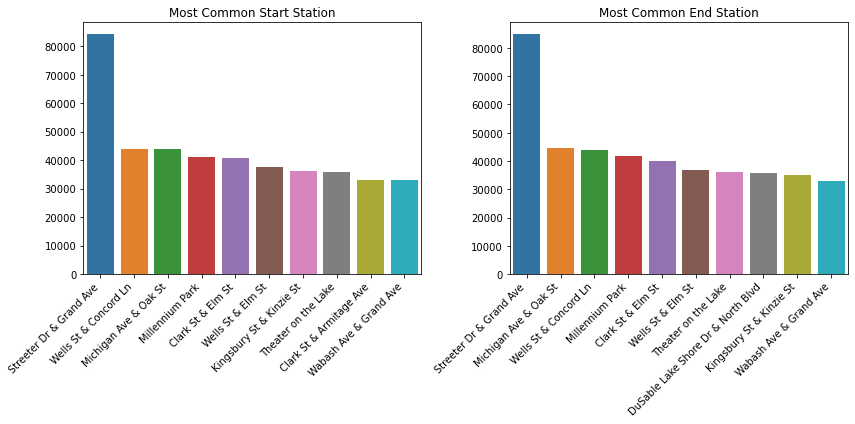

In [100]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Most Common Start Station')
plot = sns.barplot(x=start_stations[1:],y=start_occurances[1:])
plt.setp(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)
plt.title('Most Common End Station')
plot = sns.barplot(x=end_stations[1:],y=end_occurances[1:])
plt.setp(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()